In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

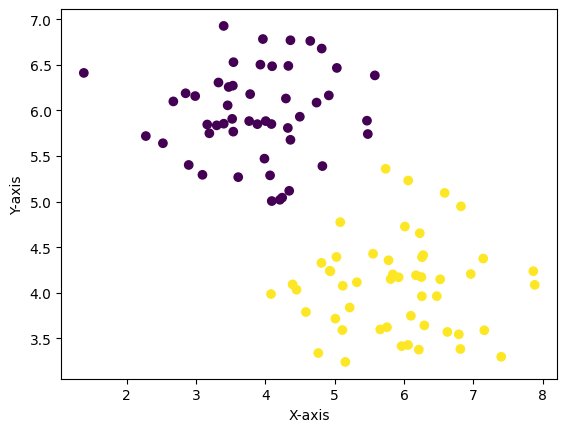

In [349]:
# Set a random seed for reproducibility
np.random.seed(42)
n_points = 50
# Class 1
class1_points = np.random.normal(loc=[4, 6], scale=[1, 0.5], size=(n_points, 2))
# Class 2
class2_points = np.random.normal(loc=[6, 4], scale=[1, 0.5], size=(n_points, 2))
# Combine the points from both classes
all_points = np.concatenate([class1_points, class2_points])
# Create labels for the classes (0 for class 1, 1 for class 2)
labels = np.array([0] * n_points + [1] * n_points)
# Scatter plot to visualize the dataset
plt.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [350]:
scaler = MinMaxScaler(feature_range=(-1,1))
all_points = scaler.fit_transform(all_points)
y = labels

In [351]:
X = all_points

In [352]:
def plot_points(X):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_aspect('equal', adjustable='box')
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='cividis')
    plt.xlabel('X1-axis')
    plt.ylabel('X2-axis')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    return ax, fig

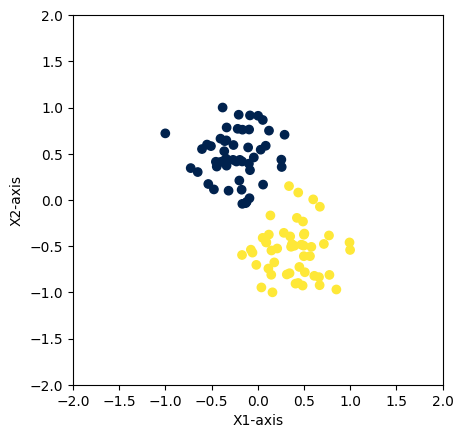

In [353]:
plot_points(X)
plt.show()

$$
Target \ function: J(w) = \frac{(m_1 - m_2)^2}{s_1^2 + s_2^2} = \frac{w^TS_Bw}{w^TS_Ww}
$$

In [354]:
X = pd.DataFrame(X)
X

,0,1
0,-0.041964,0.459615
1,0.004448,0.910617
2,-0.266641,0.433588
3,0.290809,0.705491
4,-0.338981,0.644443
...,...,...
95,0.282900,-0.356263
96,0.485979,-0.926943
97,0.473402,-0.484150
98,0.148456,-0.547022


In [355]:
X_0 = X.loc[np.where(labels == 0)].values
X_1 = X.loc[np.where(labels == 1)].values
X = X.values
X_0.shape, X_1.shape

((50, 2), (50, 2))

In [356]:
m0 = np.mean(X_0.T, axis=1 ,keepdims=True)
m1 = np.mean(X_1.T, axis=1 ,keepdims=True)
m0, m1

(array([[-0.23636772],
        [ 0.47759934]]),
 array([[ 0.39082084],
        [-0.55073134]]))

In [357]:
a = (m0 - m1)
SB = a.dot(a.T)
SB.shape

(2, 2)

In [358]:
A = X_0.T - np.tile(m0, (1, X_0.shape[0]))
B = X_1.T - np.tile(m1, (1, X_1.shape[0]))
S_W = A.dot(A.T) + B.dot(B.T)
S_W.shape

(2, 2)

$$
w \ is \ eigen \ vector \ with \ largest \ eigen \ value \ of \ S_W^{-1}.S_B 
$$

In [359]:
_,W = np.linalg.eig(np.linalg.inv(S_W).dot(SB))
W

array([[-0.85373799,  0.55000272],
       [-0.52070284, -0.83516286]])

In [360]:
w = W[:, 0]
w

array([-0.85373799, -0.52070284])

In [361]:
def plot_line(W, ax):
    start_point = [-10, (W[0]/(-W[1]) *(-10))]
    end_point = [10, (W[0]/(-W[1])*(10))]
    ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], c='r')
    # ax.plot([0, W[1]], [0, W[2]], c = 'g')

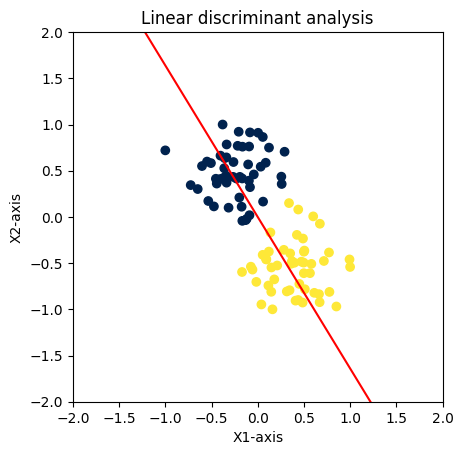

In [365]:
ax, fig = plot_points(X)
ax.set_title("Linear discriminant analysis")
plot_line(w, ax)
plt.show()